## Projeto Analise Socieconomica em resultado de Provas de avaliação de ensino

Foi feito o entendimento da base de dados que consiste em 62 respostas de questões diversas sobre a vida escolar e socieconomicas de diversos estudantes.


In [3]:
import ClassesAnalise as CA

In [4]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

Iniciando a etapa de Preparação dos Dados será feita:
- analise de nulos
- analise de correlação de features
- analise dos tipos de cada variavel
- analise de conteudo de variaveis

Tratamento com undersampling e com redução de classes

In [25]:
df = pd.read_csv('SARESP_train.csv')
print(df['nivel_profic_mat'].value_counts())

#agrupa classes avançado e adequado da coluna profic mat 
df.loc[df["nivel_profic_mat"] == "Avançado", "nivel_profic_mat"] = 'Adequado'

#remove colunas com mais de 10% de nulos
df = df.dropna(axis=1, thresh=int(len(df)/10), how="Any")

#normalização de categoricos
df = CA.typeEncoder(df,'object')

#reduz classes com exemplos desbalanceados
df2 = df.drop(df[df['nivel_profic_mat'] == 2].sample(frac=.4).index)
df2 = df2.drop(df[df['nivel_profic_mat'] == 0].sample(frac=.5).index)
df= df2
df = CA.typeEncoder(df,'object')
#retirada de variaveis futuras, que são resposta.(Só deixar a que for prever)

dataTrain = df.drop(['porc_ACERT_lp'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)

#remocao de variaveis de identificação sistemica

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)

CA.relevantFeatures(dataTrain,'nivel_profic_mat',0.05)


C:\Users\lucia\AppData\Local\Temp\ipykernel_21900\782531760.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SARESP_train.csv')


Básico              54294
Abaixo do Básico    44891
Adequado            17132
Avançado             4279
Name: nivel_profic_mat, dtype: int64


C:\Users\lucia\Desktop\Desenvolvimento\ImplementacoesReais\testScores by socialeconimcs\assignment02\assignment02\ClassesAnalise.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,i] = le.fit_transform(df.iloc[:,i])


Q9                  0.051916
Q10                 0.148554
Q22                 0.099731
Q23                 0.062468
Q26                 0.061349
Q27                 0.066955
Q42                 0.052422
SERIE_ANO           0.104982
Tem_Nec             0.098179
nivel_profic_mat    1.000000
Name: nivel_profic_mat, dtype: float64

Tratamento sem undersampling e com redução de classes

In [33]:
df = pd.read_csv('SARESP_train.csv')
print(df['nivel_profic_mat'].value_counts())

#agrupa classes avançado e adequado da coluna profic mat 
df.loc[df["nivel_profic_mat"] == "Avançado", "nivel_profic_mat"] = 'Adequado'

#remove colunas com mais de 10% de nulos
df = df.dropna(axis=1, thresh=int(len(df)/10), how="Any")

#normalização de categoricos
df = CA.typeEncoder(df,'object')

#retirada de variaveis futuras, que são resposta.(Só deixar a que for prever)

dataTrain = df.drop(['porc_ACERT_lp'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)

#remocao de variaveis de identificação sistemica

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)

CA.relevantFeatures(dataTrain,'nivel_profic_mat',0.05)


C:\Users\lucia\AppData\Local\Temp\ipykernel_21900\3330890525.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SARESP_train.csv')


Básico              54294
Abaixo do Básico    44891
Adequado            17132
Avançado             4279
Name: nivel_profic_mat, dtype: int64


C:\Users\lucia\Desktop\Desenvolvimento\ImplementacoesReais\testScores by socialeconimcs\assignment02\assignment02\ClassesAnalise.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,i] = le.fit_transform(df.iloc[:,i])


Q9                  0.062561
Q10                 0.158983
Q20                 0.061875
Q22                 0.123375
Q23                 0.078173
Q26                 0.080636
Q27                 0.080758
Q42                 0.061311
Q57                 0.054073
Q62                 0.050487
Q63                 0.051670
SERIE_ANO           0.144796
Tem_Nec             0.100374
nivel_profic_mat    1.000000
Name: nivel_profic_mat, dtype: float64

Tratamento sem undersampling e sem redução de classes

In [16]:
df = pd.read_csv('SARESP_train.csv')
print(df['nivel_profic_mat'].value_counts())
df = df.dropna(axis=1, thresh=int(len(df)/10), how="Any")
df = CA.typeEncoder(df,'object')

#retirada de variaveis futuras, que são resposta.(Só deixar a que for prever)

dataTrain = df.drop(['porc_ACERT_lp'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)

#remocao de variaveis de identificação sistemica

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)

CA.relevantFeatures(dataTrain,'nivel_profic_mat',0.05)


C:\Users\lucia\AppData\Local\Temp\ipykernel_21900\2841780987.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SARESP_train.csv')


Básico              54294
Abaixo do Básico    44891
Adequado            17132
Avançado             4279
Name: nivel_profic_mat, dtype: int64


C:\Users\lucia\Desktop\Desenvolvimento\ImplementacoesReais\testScores by socialeconimcs\assignment02\assignment02\ClassesAnalise.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,i] = le.fit_transform(df.iloc[:,i])


Q9                  0.058334
Q10                 0.147750
Q20                 0.055183
Q22                 0.107776
Q23                 0.068280
Q26                 0.070904
Q27                 0.072163
Q42                 0.056218
SERIE_ANO           0.122105
Tem_Nec             0.094544
nivel_profic_mat    1.000000
Name: nivel_profic_mat, dtype: float64

Após analise das variáveis, foram removidas features que são relacionadas com a variavel resposta e não faziam sentido estar no conjunto de treino. Pelo problema aqui proposto ser prever a nota de matematica na prova en questão, as demais notas de outras disciplinas tambem não estão disponiveis no momento de previsão, portanto serão retiradas. 

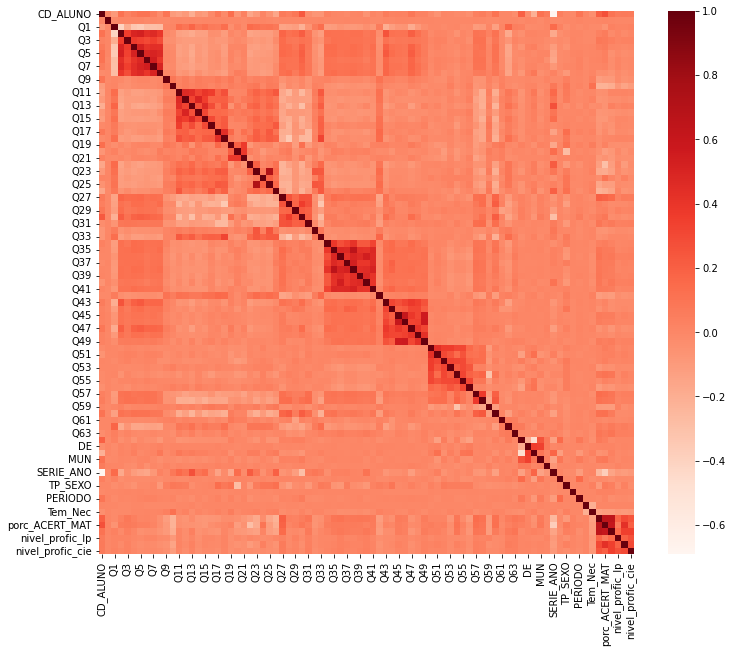

In [230]:
from matplotlib import pyplot


plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,  cmap=plt.cm.Reds)
plt.show() 

Aplicou-se o metodo GridSearch para estimar parametros do nosso modelo, consistindo em realizar todas as combinações de parametros fornecidas pelo cientista.

In [191]:
'''from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

space = dict(solver=['newton-cg'], multi_class=['multinomial'],
             penalty=['l2', 'none'], C=[0.001, 0.03, 0.1, 0.5, 0.8, 1.0, 1.5], 
             class_weight=['balanced', None])

search_clf = GridSearchCV(model, space, cv=3, verbose=2,
                          scoring='precision_micro', n_jobs=3)

grid_search = search_clf.fit(x_train, y_train)

#summarize result
print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)'''

Fitting 3 folds for each of 28 candidates, totalling 84 fits


KeyboardInterrupt: 

In [34]:
x = dataTrain.drop(['nivel_profic_mat'],axis=1)
y = dataTrain['nivel_profic_mat']

print(y.value_counts())

from sklearn.model_selection import train_test_split


x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=13)


2    54294
0    44891
1    21411
Name: nivel_profic_mat, dtype: int64


resultados com undersampling e com classes reduzidas

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(solver='newton-cg', verbose=1,
                         multi_class='multinomial')
result_clf = clf.fit(x_train, y_train)

y_pred = result_clf.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

gini_score = lambda y_true,y_score: 2*roc_auc_score(y_true,y_score)-1

score = clf.predict_proba(x_train)[:,1]

print(confusion_matrix(y_test,y_pred))

print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lucia\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lucia\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[[3244  501 2971]
 [ 198 3697 2498]
 [1765 1722 6334]]
Acurácia: 0.58
              precision    recall  f1-score   support

           0       0.62      0.48      0.54      6716
           1       0.62      0.58      0.60      6393
           2       0.54      0.64      0.59      9821

    accuracy                           0.58     22930
   macro avg       0.59      0.57      0.58     22930
weighted avg       0.59      0.58      0.58     22930



C:\Users\lucia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.0s finished


resultados sem undersampling e com classes reduzidas

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(solver='newton-cg', verbose=1,
                         multi_class='multinomial')
result_clf = clf.fit(x_train, y_train)

y_pred = result_clf.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

gini_score = lambda y_true,y_score: 2*roc_auc_score(y_true,y_score)-1

score = clf.predict_proba(x_train)[:,1]

print(confusion_matrix(y_test,y_pred))

print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[ 7614   374  5512]
 [  277  2179  3994]
 [ 3916  1167 11146]]
Acurácia: 0.58
              precision    recall  f1-score   support

           0       0.64      0.56      0.60     13500
           1       0.59      0.34      0.43      6450
           2       0.54      0.69      0.60     16229

    accuracy                           0.58     36179
   macro avg       0.59      0.53      0.54     36179
weighted avg       0.59      0.58      0.57     36179



C:\Users\lucia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.9s finished


resultados sem undersampling e sem classes reduzidas

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(solver='newton-cg', verbose=1,
                         multi_class='multinomial')
result_clf = clf.fit(x_train, y_train)

y_pred = result_clf.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

gini_score = lambda y_true,y_score: 2*roc_auc_score(y_true,y_score)-1

score = clf.predict_proba(x_train)[:,1]

print(confusion_matrix(y_test,y_pred))

print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[ 7615   184     1  5700]
 [  262   885     1  4010]
 [   17   491     0   784]
 [ 3929   601     0 11699]]
Acurácia: 0.56
              precision    recall  f1-score   support

           0       0.64      0.56      0.60     13500
           1       0.41      0.17      0.24      5158
           2       0.00      0.00      0.00      1292
           3       0.53      0.72      0.61     16229

    accuracy                           0.56     36179
   macro avg       0.40      0.36      0.36     36179
weighted avg       0.54      0.56      0.53     36179



C:\Users\lucia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


Agrupar classes target conforme a prioridade de identificação dado que as classes são desbalanceadas (ver porcentagens)
remover municipio


teste com undersampling e com classes reduzidas

In [30]:
model = clf
dfT = pd.read_csv('SARESP_test.csv')

dfT = dfT.dropna(axis=1, thresh=int(len(dfT)/10), how="Any")

dfT.loc[dfT["nivel_profic_mat"] == "Avançado", "nivel_profic_mat"] = 'Adequado'


dfT = CA.typeEncoder(dfT,'object')


dfT = CA.typeEncoder(dfT,'object')



dataTrain = dfT.drop(['porc_ACERT_lp'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)



x_test = dataTrain.drop(['nivel_profic_mat'],axis=1)
y_test = dataTrain['nivel_profic_mat']

teste sem undersampling e com classes reduzidas

In [36]:
model = clf
dfT = pd.read_csv('SARESP_test.csv')

dfT = dfT.dropna(axis=1, thresh=int(len(dfT)/10), how="Any")

dfT.loc[dfT["nivel_profic_mat"] == "Avançado", "nivel_profic_mat"] = 'Adequado'


dfT = CA.typeEncoder(dfT,'object')


dfT = CA.typeEncoder(dfT,'object')



dataTrain = dfT.drop(['porc_ACERT_lp'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)



x_test = dataTrain.drop(['nivel_profic_mat'],axis=1)
y_test = dataTrain['nivel_profic_mat']

teste sem undersampling e sem classes reduzidas

In [22]:
model = clf
dfT = pd.read_csv('SARESP_test.csv')

dfT = dfT.dropna(axis=1, thresh=int(len(dfT)/10), how="Any")

dfT = CA.typeEncoder(dfT,'object')


dfT = CA.typeEncoder(dfT,'object')



dataTrain = dfT.drop(['porc_ACERT_lp'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)



x_test = dataTrain.drop(['nivel_profic_mat'],axis=1)
y_test = dataTrain['nivel_profic_mat']

In [37]:
y_pred = model.predict(x_test)

com com 

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

gini_score = lambda y_true,y_score: 2*roc_auc_score(y_true,y_score)-1

score = model.predict_proba(x_train)[:,1]

print(confusion_matrix(y_test,y_pred))

print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[207  29 166]
 [  4 104  67]
 [ 97  87 239]]
Acurácia: 0.55
              precision    recall  f1-score   support

           0       0.67      0.51      0.58       402
           1       0.47      0.59      0.53       175
           2       0.51      0.57      0.53       423

    accuracy                           0.55      1000
   macro avg       0.55      0.56      0.55      1000
weighted avg       0.57      0.55      0.55      1000



sem com

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

gini_score = lambda y_true,y_score: 2*roc_auc_score(y_true,y_score)-1

score = model.predict_proba(x_train)[:,1]

print(confusion_matrix(y_test,y_pred))

print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[231  14 157]
 [  6  71  98]
 [124  52 247]]
Acurácia: 0.55
              precision    recall  f1-score   support

           0       0.64      0.57      0.61       402
           1       0.52      0.41      0.46       175
           2       0.49      0.58      0.53       423

    accuracy                           0.55      1000
   macro avg       0.55      0.52      0.53      1000
weighted avg       0.56      0.55      0.55      1000



sem sem 

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

gini_score = lambda y_true,y_score: 2*roc_auc_score(y_true,y_score)-1

score = model.predict_proba(x_train)[:,1]

print(confusion_matrix(y_test,y_pred))

print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[230   9   1 162]
 [  5  40   0  89]
 [  1  17   0  23]
 [123  34   0 266]]
Acurácia: 0.54
              precision    recall  f1-score   support

           0       0.64      0.57      0.60       402
           1       0.40      0.30      0.34       134
           2       0.00      0.00      0.00        41
           3       0.49      0.63      0.55       423

    accuracy                           0.54      1000
   macro avg       0.38      0.37      0.37      1000
weighted avg       0.52      0.54      0.52      1000

